In [15]:
import pandas as pd
from sklearn.utils import shuffle
import numpy as np

In [16]:
df=pd.read_csv('./Pistachio_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.csv')

features = df.drop('Class', axis=1)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()#数据预处理，使特征的均值为0，标准差为1
pipe = Pipeline([("scaler",StandardScaler()),#数据预处理
                ("pca",PCA(n_components=28))])#pca主成成分分析，n_comp为5意思是将特征数降到5个

X_tr = pipe.fit_transform(features)#返回降维后的数据
print(pipe["pca"].components_)


[[-2.88800404e-01  2.84217987e-02 -1.54722227e-01 -2.39727948e-01
   1.37620116e-01 -2.91184356e-01 -1.67296854e-01 -2.52917261e-01
  -1.53421407e-01  1.65285524e-01 -1.42521198e-01 -2.20706688e-01
   2.96802913e-01  1.86873900e-01 -2.17096060e-01 -1.33672441e-01
  -2.53141778e-01 -2.49889467e-01 -2.06130545e-01 -7.02029385e-02
  -6.58882354e-02 -2.51360984e-02  2.30141085e-01  2.28327461e-01
   1.59520763e-01 -1.20364695e-01 -7.67883039e-02  3.09012593e-02]
 [ 6.43444958e-02  2.95630618e-01 -1.16419511e-01  2.79474852e-01
  -3.43896158e-01  6.13315153e-02 -2.76964194e-01  1.67193898e-01
  -1.66704190e-01 -3.30777799e-01 -2.63332521e-01  2.21664626e-01
  -1.27758514e-01  2.35287004e-01  2.24337707e-01 -2.76638252e-01
  -8.06313415e-02 -1.06430868e-01 -9.62491420e-02  9.45302031e-03
   4.00418016e-02 -1.31713294e-02  1.47787155e-01  1.10183235e-01
   7.31612601e-02 -1.83895379e-01 -1.60933516e-01 -8.87786160e-02]
 [ 8.50507845e-02 -5.66110314e-02 -1.75742705e-03  7.34699467e-02
  -7.802

In [18]:
#打印出pca的值
dict(zip(features.columns,pipe["pca"].explained_variance_ratio_))
# Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class

{'Area': 0.3192367506520263,
 'Perimeter': 0.1955071720715125,
 'Major_Axis': 0.1524903443364681,
 'Minor_Axis': 0.1013170631040961,
 'Eccentricity': 0.09329202146839384,
 'Eqdiasq': 0.03473272037774846,
 'Solidity': 0.023559785784405908,
 'Convex_Area': 0.018771366252161168,
 'Extent': 0.014532260640451084,
 'Aspect_Ratio': 0.013055925979653186,
 'Roundness': 0.009761632708500957,
 'Compactness': 0.006530381177396197,
 'Shapefactor_1': 0.0056299840906933836,
 'Shapefactor_2': 0.0024538781250312515,
 'Shapefactor_3': 0.001783509947081542,
 'Shapefactor_4': 0.0017008954733782947,
 'Mean_RR': 0.0014174500327816348,
 'Mean_RG': 0.0011484053104280475,
 'Mean_RB': 0.0010117782550350786,
 'StdDev_RR': 0.0009525857001611071,
 'StdDev_RG': 0.0004567121091806719,
 'StdDev_RB': 0.00037053652540802815,
 'Skew_RR': 0.00019043822716306082,
 'Skew_RG': 4.256618667369333e-05,
 'Skew_RB': 2.593292180649912e-05,
 'Kurtosis_RR': 2.353929116291409e-05,
 'Kurtosis_RG': 2.676337191757745e-06,
 'Kurtosis_RB

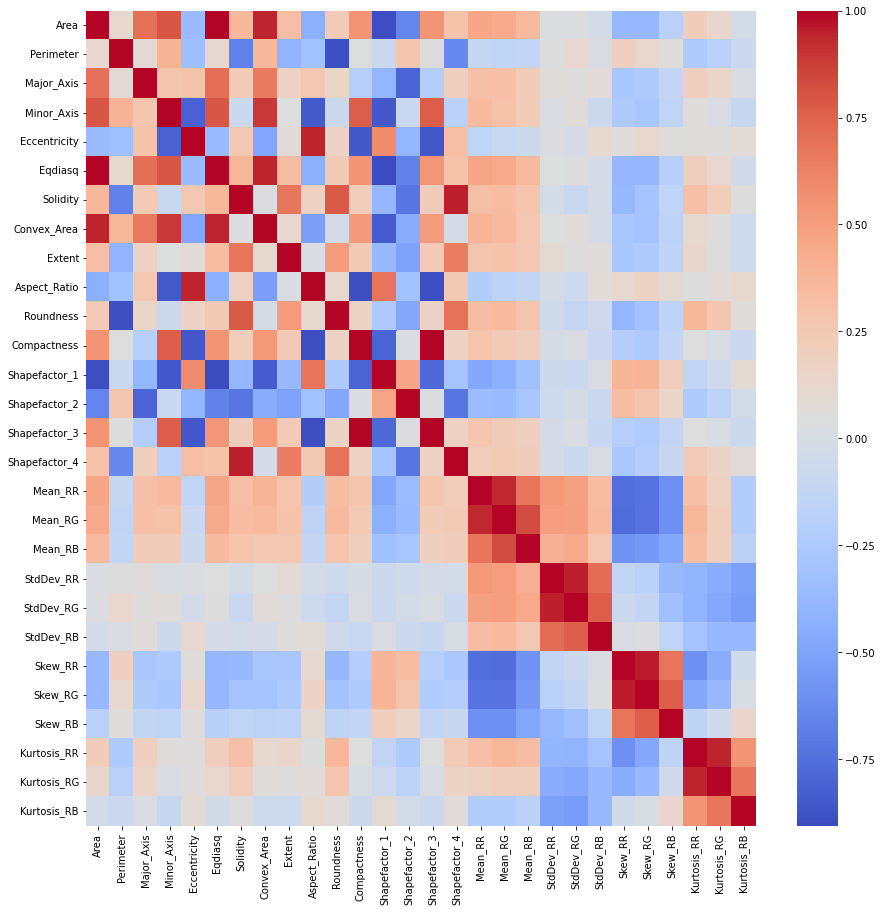

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
f = plt.figure(figsize=(15,15))#图的长宽大小
# print(df.corr(method='spearman'))
sns.heatmap(features.corr(method='pearson'),cmap="coolwarm")#corr画热力图所用的，cmap是颜色
plt.show()

In [20]:
#计算
res=np.corrcoef(features,rowvar=False)

In [21]:
print(res)

[[ 1.00000000e+00  1.21726789e-01  6.96868994e-01  7.97537004e-01
  -3.61999347e-01  9.97377806e-01  3.59651921e-01  9.44108774e-01
   3.25960810e-01 -4.27822252e-01  2.43973934e-01  5.52495071e-01
  -8.92352025e-01 -6.50750189e-01  5.45745385e-01  2.93081121e-01
   4.57826476e-01  4.34723666e-01  3.46063374e-01  2.43664439e-02
   3.37933687e-02 -2.65364618e-02 -3.71604066e-01 -3.71855945e-01
  -1.89369909e-01  2.11781010e-01  1.31374111e-01 -3.36811987e-02]
 [ 1.21726789e-01  1.00000000e+00  1.00466782e-01  3.92661696e-01
  -3.33143057e-01  1.19195915e-01 -6.71781859e-01  3.69759534e-01
  -4.02768063e-01 -3.11043022e-01 -8.91935267e-01  4.49979215e-02
  -8.40439394e-02  2.74915582e-01  4.80263814e-02 -6.31699053e-01
  -1.13158210e-01 -1.41526038e-01 -1.30872136e-01  5.39662964e-02
   1.23068621e-01  1.66235170e-02  1.97417392e-01  1.28448008e-01
   5.98008937e-02 -2.42893932e-01 -1.86431850e-01 -7.74325130e-02]
 [ 6.96868994e-01  1.00466782e-01  1.00000000e+00  2.73147375e-01
   2.974